In [ ]:
#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv
from Data_scraping import *
#Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""


def get_all_tweets(screen_name,consumer_key,consumer_secret,access_key,access_secret):
    '''This function gets all the tweets for the given screen name
    input:
    screen_name--> twitter user name
    consumer_key--> provide your consumer_key generated from dev.twitter.com
    consumer_secret--> provide your consumer_secret generated from dev.twitter.com
    access_key--> provide your access_key generated from dev.twitter.com
    access_secret--> provide your access_secret generated from dev.twitter.com
    '''
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize a list to hold all the tweepy Tweets
    alltweets = []  

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv 
    #outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    #write the csv  
    #with open('%s_tweets.csv' % screen_name, 'w') as f:
    #    writer = csv.writer(f)
    #    writer.writerow(["id","created_at","text"])
    #    writer.writerows(outtweets)
    with open('%s_tweets.txt' % screen_name, 'w') as f:
        for i in outtweets:
            f.write(i[-1]+'\n')
    return outtweets

def get_tweets_for_all(names):
    '''This function downloads twitter files for all the names listed
    input:
    names--> list of names
    '''
    assert isinstance(names,list) & all(isinstance(i,str) for i in names),"input names not as expected"
    for i in names:
        get_all_tweets(i)
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)
#api = tweepy.API(auth)
#api.verify_credentials()

In [ ]:
def cleaned_up_text(fname,name):
    '''This function prunes the dataset to access important words
    input:
    fname--> file name
    output:
    cleaned up text data as string
    '''
    assert isinstance(fname,str),"file name is not a string"
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    shortword = re.compile(r'\W*\b\w{1,5}\b')
    with open(fname,'r') as content_file:
        content = content_file.read()
        text=re.sub(r'http\S+', '', content)
        text=re.sub(r'%s'%name,'', text)
        text=shortword.sub('',text)
        text=emoji_pattern.sub('',text)
    return text
import numpy as np
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray       

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from skimage.transform import resize
import warnings
from imageio import imread as imr
import re
warnings.filterwarnings("ignore")
mask2=imr('costa_rica.jpg')
mask2=rgb2gray(mask2)
mask2[mask2>250]=255
mask2[mask2<250]=0
mask2=resize(mask2,(1200,1200))
data1=cleaned_up_text('translated_Laura_ch_tweets.txt','Laura_Ch')
data2=cleaned_up_text('translated_CarlosAlvQ_tweets.txt','CarlosAlvQ')
data3=cleaned_up_text('translated_luisguillermosr_tweets.txt','luisguillermosr')

# Create and generate a word cloud image:
#print(text)
wordcloud = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data1)

#print(wordcloud)
# Display the generated image:
wordcloud.to_file("first_review.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#print(wordcloud.words_.values())


In [ ]:
# print(wordcloud.words_)
# print(wordcloud3.words_)
import enchant
import pandas as pd
def find_diff(word):
    d=enchant.Dict("en-US")
    diff = dict()
    for word in wordcloud.words_.keys():
        if (word in wordcloud3.words_) and d.check(word) :
            diff[word] = wordcloud.words_[word] - wordcloud3.words_[word]
    diff=pd.Series(diff)
    diff=diff.sort_values()
    return diff

In [ ]:
import pandas as pd
diff = pd.Series(diff)
diff=diff.sort_values()


In [ ]:
diff = pd.Series.abs(diff)

In [ ]:
print(diff)

In [ ]:
def file_info(fname):
    with open(fname) as infile:
        lines=0
        words=0
        characters=0
        for line in infile:
            wordslist=line.split()
            lines=lines+1
            words=words+len(wordslist)
            characters += sum(len(word) for word in wordslist)
    return lines,words,characters
def makeImage(text,name):
    mask2=imr('costa_rica.jpg')
    mask2=rgb2gray(mask2)
    mask2[mask2>250]=255
    mask2[mask2<250]=0
    mask2=resize(mask2,(1200,1200))
    wc = WordCloud(background_color="white", max_words=1000, mask=mask2)
    # generate word cloud
    wc.generate(text)
    wc.to_file("%s.png"%name)
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def makeImage_freq(text,name):
    '''
    '''
    assert isinstance(text,dict)
    mask2=imr('costa_rica.jpg')
    mask2=rgb2gray(mask2)
    mask2[mask2>250]=255
    mask2[mask2<250]=0
    mask2=resize(mask2,(1200,1200))
    wc = WordCloud(background_color="white", max_words=1000, mask=mask2)
    # generate word cloud
    wc.generate_from_frequencies(text)
    wc.to_file("%s.png"%name)
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
print(type(diff))
makeImage_freq(dict(diff[0:60]),"luisguiller")
makeImage_freq(dict(diff[-60:]),"laura_ch")

In [ ]:
wordcloud1 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data1)
wordcloud1.to_file("first_review1.png")
wordcloud2 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data2)
wordcloud2.to_file("first_review2.png")
wordcloud3 = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data3)
wordcloud3.to_file("first_review3.png")
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.cloud import translate
import os
import time
# Instantiates a client

def translate_file(fname):
    translate_client = translate.Client()
    avg=os.path.getsize(fname)
    n=avg//19000
    print(n)
    with open(fname,'r') as file,open('translated_%s' %fname,'w') as fileT:
        for i in range(n):
            print(i)
            text=file.read(19000)
            text=translate_client.translate(text,target_language='en')
            fileT.write(text['translatedText'])
translate_file("Laura_ch_tweets.txt")

In [ ]:
translate_file('luisguillermosr_tweets.txt')

In [ ]:
translate_file('CarlosAlvQ_tweets.txt')

In [ ]:
data=imr('earth.png')

In [5]:
from Twitter_data import *
from Data_scraping_v2 import *

In [41]:
data=web_search('poverty level indicators in costa rican households',['sanitation', 'food', 'jobs', 'inequality',\
                                                                      'education','infrastructure','government',\
                                                                      'resources','employment','home','housing',\
                                                                     ,'development','economic','background'\
                                                                     ],20)

In [47]:
mask_earth=imr('earth4.png')
#mask_earth=resize(mask_earth,(600,600))

In [50]:
wordcloud_google2=WordCloud(max_words=35628500,background_color='white').generate_from_frequencies(data)

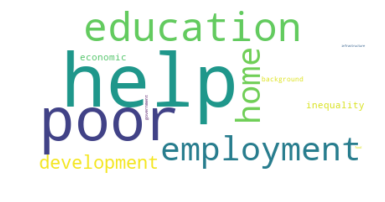

In [51]:
wordcloud_google2.to_file("google_search2.png")
    # show
plt.imshow(wordcloud_google2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
wordcloud_google.generate_from_frequencies(data)

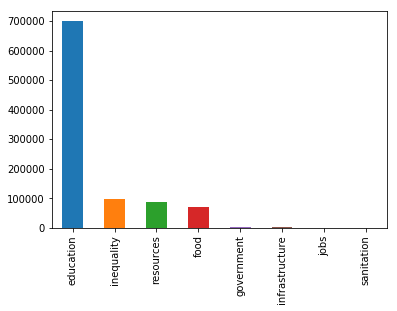

In [40]:
D=pd.Series(data)
D=D.sort_values(ascending=False)
ax=D.plot.bar(label=('number of hits','keywords')
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

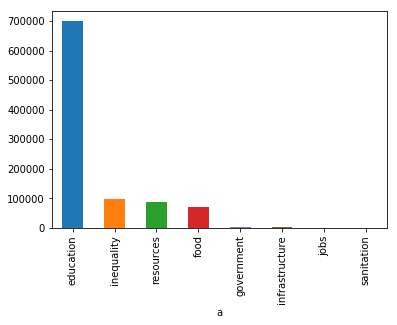

In [56]:
ax=D.plot.bar(label=('number of hits','keywords'))
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
ax.set_xlabel('keywords')
ax.set_ylabel('number of hits')
plt.show()

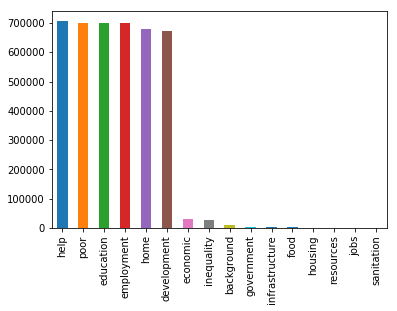

In [52]:

D2=pd.Series(data)
D2=D2.sort_values(ascending=False)
D2.plot.bar()
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()